In [10]:
%matplotlib inline
import requests
import time
import json
import pandas as pd
from datetime import datetime, timedelta
from pandas.io.json import json_normalize

어떤 process?

일단은 빠르게 1round 를 돌아보자

1round : 1달
    
    1. collect data : 수치(거래정보 + coin meta정보) + 문자(코인 관련 뉴스) / 일단 거래량 top 10 coins -> save mysql
    2. preprocessing
    3. modeling /w tensorflow
    4. tensorflow + flask : 1분단위 update (buy/hold/sell + reasons)
    5. performance monitoring system

### 1. collect data

* target : BTC, EOS, TRX, BCC, ADA, GRS, ICX, ETH, QTUM, XRP, ZEC, REP, STORM, GTO, SBD, XLM, SC, SNT, ZIL, NEO, ETC, LTC, STEEM

* time :2018년 5월 1일 ~ 2018년 5월 14일

#### 각 코인별 시간대별 데이터

|        변수명        |      설명      |
|:--------------------:|:--------------:|
|    candleDateTime    |       시간     |
|   candleDateTimeKst  |    한국시간    |
|     openingPrice     |      시가      |
|      highPrice       |      고가      |
|       lowPrice       |      저가      |
|      tradePrice      | 체결가(최종가) |
|  candleAccTradePrice |   누적체결량   |
| candleAccTradeVolume |  누적거래대금  |

## parameters

In [48]:
coin_codes = ['BTC', 'EOS', 'TRX', 'BCC', 'ADA', 'GRS', 
              'ICX', 'ETH', 'QTUM', 'XRP', 'ZEC', 'REP',
              'STORM', 'GTO', 'SBD', 'XLM', 'SC', 'SNT',
              'ZIL', 'NEO', 'ETC', 'LTC', 'STEEM']

time_unit = 'minutes' # 분단위 데이터
minute_type = '1' # 1분
market = 'KRW' # KRW, BTC, ETH, USDT
count = 1

# 2018년 5월 13일 하루치 데이터 가져오기
from_date = '2018-05-13 23:59:59'
to_date = '2018-05-14 23:59:59'
from_datetime = datetime.strptime(from_date, "%Y-%m-%d %H:%M:%S")
end_datetime = datetime.strptime(to_date, "%Y-%m-%d %H:%M:%S")

times = []
while from_datetime <= end_datetime:
    times.append(str(from_datetime))
    from_datetime += timedelta(minutes=1)

In [49]:
def getCoinInfo(coin_code, date, time_unit='minutes', minute_type='1', market='KRW', count=1):
    """
    upbit api 접속해서 coin 정보 수집
    """
    format_txt = {'time_unit' : time_unit,
                 'minute_type' : minute_type,
                 'market' : market,
                 'coin_code' : coin_code,
                 'count' : count,
                 'date' : date}
    url = """https://crix-api-cdn.upbit.com/v1/crix/candles/{time_unit}/{minute_type}\
?code=CRIX.UPBIT.{market}-{coin_code}&\
count={count}&\
to={date}""".format(**format_txt)
    resp = requests.get(url)
    d = json.loads(resp.text)
    return d

In [51]:
len(times)

1441

In [52]:
df_total = pd.DataFrame(columns=['candleAccTradePrice', 'candleAccTradeVolume', 'candleDateTime',
       'candleDateTimeKst', 'code', 'highPrice', 'lowPrice', 'openingPrice',
       'timestamp', 'tradePrice', 'unit'])

In [53]:
df_total.shape

(0, 11)

In [54]:
%%time
# 나중에 sql 로 db 화 할 때는 각 coin 별로 적재
result = []
for coin in coin_codes:
    for t in times:
        g = getCoinInfo(coin, t)[0]
        result.append(g)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [61]:
len(result)

3443

In [62]:
df = pd.DataFrame.from_dict(result)

In [63]:
df.shape

(3443, 11)

In [68]:
df_btc = df[df['code'] == 'CRIX.UPBIT.KRW-BTC']
df_btc.shape

(1441, 11)

In [71]:
df_trx = df[df['code'] == 'CRIX.UPBIT.KRW-EOS']
df_trx.shape

(1441, 11)

In [72]:
from scipy.stats.stats import pearsonr

In [73]:
pearsonr(df_btc['tradePrice'], df_trx['tradePrice'])

(0.6490577619381902, 4.05871778919473e-173)

In [74]:
from ggplot import *

ModuleNotFoundError: No module named 'ggplot'

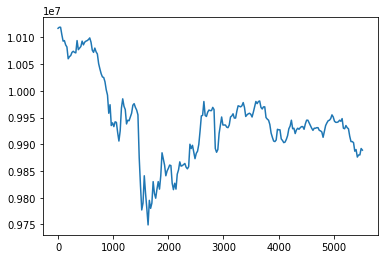

In [37]:
df_btc['tradePrice'].plot()

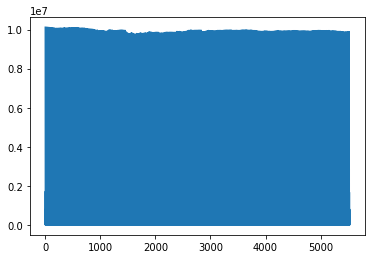

In [34]:
df['tradePrice'].plot()

In [152]:
result[0]

[{'candleAccTradePrice': 63874941.09111,
  'candleAccTradeVolume': 6.65023063,
  'candleDateTime': '2018-05-13T11:59:00+00:00',
  'candleDateTimeKst': '2018-05-13T20:59:00+09:00',
  'code': 'CRIX.UPBIT.KRW-BTC',
  'highPrice': 9609000.0,
  'lowPrice': 9595000.0,
  'openingPrice': 9604000.0,
  'timestamp': 1526212805971,
  'tradePrice': 9599000.0,
  'unit': 1}]

In [115]:
url = """https://crix-api-cdn.upbit.com/v1/crix/candles/{time_unit}/{minute_type}\
?code=CRIX.UPBIT.{market}-{coin_code}&\
count={count}&\
to={date}""".format(**format_txt)

In [116]:
resp = requests.get(url)
d = json.loads(resp.text)

In [118]:
d

[{'candleAccTradePrice': 63874941.09111,
  'candleAccTradeVolume': 6.65023063,
  'candleDateTime': '2018-05-13T11:59:00+00:00',
  'candleDateTimeKst': '2018-05-13T20:59:00+09:00',
  'code': 'CRIX.UPBIT.KRW-BTC',
  'highPrice': 9609000.0,
  'lowPrice': 9595000.0,
  'openingPrice': 9604000.0,
  'timestamp': 1526212805971,
  'tradePrice': 9599000.0,
  'unit': 1},
 {'candleAccTradePrice': 26088510.97823,
  'candleAccTradeVolume': 2.71765608,
  'candleDateTime': '2018-05-13T11:58:00+00:00',
  'candleDateTimeKst': '2018-05-13T20:58:00+09:00',
  'code': 'CRIX.UPBIT.KRW-BTC',
  'highPrice': 9605000.0,
  'lowPrice': 9596000.0,
  'openingPrice': 9600000.0,
  'timestamp': 1526212744740,
  'tradePrice': 9605000.0,
  'unit': 1},
 {'candleAccTradePrice': 21349521.07293,
  'candleAccTradeVolume': 2.22428478,
  'candleDateTime': '2018-05-13T11:57:00+00:00',
  'candleDateTimeKst': '2018-05-13T20:57:00+09:00',
  'code': 'CRIX.UPBIT.KRW-BTC',
  'highPrice': 9600000.0,
  'lowPrice': 9595000.0,
  'openingP

In [117]:
json_normalize(d)

,candleAccTradePrice,candleAccTradeVolume,candleDateTime,candleDateTimeKst,code,highPrice,lowPrice,openingPrice,timestamp,tradePrice,unit
0,6.387494e+07,6.650231,2018-05-13T11:59:00+00:00,2018-05-13T20:59:00+09:00,CRIX.UPBIT.KRW-BTC,9609000.0,9595000.0,9604000.0,1526212805971,9599000.0,1
1,2.608851e+07,2.717656,2018-05-13T11:58:00+00:00,2018-05-13T20:58:00+09:00,CRIX.UPBIT.KRW-BTC,9605000.0,9596000.0,9600000.0,1526212744740,9605000.0,1
2,2.134952e+07,2.224285,2018-05-13T11:57:00+00:00,2018-05-13T20:57:00+09:00,CRIX.UPBIT.KRW-BTC,9600000.0,9595000.0,9600000.0,1526212682678,9600000.0,1


In [110]:
url

'https://crix-api-cdn.upbit.com/v1/crix/candles/minutes/1?code=CRIX.UPBIT.KRW-BTC&count=1&to=2018-05-13%2012:00:00'

In [113]:
d[0]

{'candleAccTradePrice': 63874941.09111,
 'candleAccTradeVolume': 6.65023063,
 'candleDateTime': '2018-05-13T11:59:00+00:00',
 'candleDateTimeKst': '2018-05-13T20:59:00+09:00',
 'code': 'CRIX.UPBIT.KRW-BTC',
 'highPrice': 9609000.0,
 'lowPrice': 9595000.0,
 'openingPrice': 9604000.0,
 'timestamp': 1526212805971,
 'tradePrice': 9599000.0,
 'unit': 1}

In [107]:
timestamp = d[0]['timestamp']
time.strftime("%Y-%m-%d %H:%M:%S %a", time.gmtime(timestamp / 1000.0))

'2018-05-13 12:00:05 Sun'

In [79]:
d[0]['timestamp']

1526212805971

In [87]:
datetime.utcfromtimestamp("1526212805971").strftime('%Y-%m-%dT%H:%M:%SZ')

TypeError: an integer is required (got type str)

In [80]:

print(
    datetime.datetime.fromtimestamp(
        int("1526212805971")
    ).strftime('%Y-%m-%d %H:%M:%S')
)

OSError: [Errno 22] Invalid argument

In [65]:
resp.text

'[{"code":"CRIX.UPBIT.KRW-BTC","candleDateTime":"2018-05-13T11:59:00+00:00","candleDateTimeKst":"2018-05-13T20:59:00+09:00","openingPrice":9604000.00000000,"highPrice":9609000.00000000,"lowPrice":9595000.00000000,"tradePrice":9599000.00000000,"candleAccTradeVolume":6.65023063,"candleAccTradePrice":63874941.09111000,"timestamp":1526212805971,"unit":1},{"code":"CRIX.UPBIT.KRW-BTC","candleDateTime":"2018-05-13T11:58:00+00:00","candleDateTimeKst":"2018-05-13T20:58:00+09:00","openingPrice":9600000.00000000,"highPrice":9605000.00000000,"lowPrice":9596000.00000000,"tradePrice":9605000.00000000,"candleAccTradeVolume":2.71765608,"candleAccTradePrice":26088510.97823000,"timestamp":1526212744740,"unit":1},{"code":"CRIX.UPBIT.KRW-BTC","candleDateTime":"2018-05-13T11:57:00+00:00","candleDateTimeKst":"2018-05-13T20:57:00+09:00","openingPrice":9600000.00000000,"highPrice":9600000.00000000,"lowPrice":9595000.00000000,"tradePrice":9600000.00000000,"candleAccTradeVolume":2.22428478,"candleAccTradePrice"

In [38]:
resp.text

'[{"code":"CRIX.UPBIT.KRW-BTC","candleDateTime":"2018-05-13T11:59:00+00:00","candleDateTimeKst":"2018-05-13T20:59:00+09:00","openingPrice":9604000.00000000,"highPrice":9609000.00000000,"lowPrice":9595000.00000000,"tradePrice":9599000.00000000,"candleAccTradeVolume":6.65023063,"candleAccTradePrice":63874941.09111000,"timestamp":1526212805971,"unit":1}]'

In [ ]:
기간타입: minutes, days, weeks, months (hours는 없으며 minutes로 대체)
기간: 1, 3, 5, 10, 15, 30, 60, 240 (기간타입 minutes만 해당)
마켓: KRW, BTC, ETH, USDT
암호화폐기호: BTC, ETH, XRP, STEEM, SBD 등 각 마켓의 지원 암호화폐
시세데이터수: 1(기본값), 2, 3, 4 등 원하는 시세 데이터 수 (최종시세데이터일시 기준)
최종시세데이터일시: 조회를 원하는 최종 시세 데이터 일시 (생략시 가장 최근 시세 데이터 일시, UTC 기준)

In [35]:
print(resp.text)

[{"code":"CRIX.UPBIT.KRW-BTC","candleDateTime":"2018-05-14T11:59:00+00:00","candleDateTimeKst":"2018-05-14T20:59:00+09:00","openingPrice":9566000.00000000,"highPrice":9569000.00000000,"lowPrice":9563000.00000000,"tradePrice":9565000.00000000,"candleAccTradeVolume":4.63706487,"candleAccTradePrice":44359974.33411000,"timestamp":1526299205851,"unit":1}]


In [ ]:
https://crix-api-cdn.upbit.com/v1/crix/candles/days?code=CRIX.UPBIT.KRW-BTC&count=2&to=2018-05-14%2000:00:00

In [ ]:
https://crix-api-endpoint.upbit.com/v1/crix/candles/기간타입/기간?code=CRIX.UPBIT.마켓-암호화폐기호&count=시세데이터수&to=최종시세데이터일시

In [ ]:
https://crix-api-cdn.upbit.com/v1/crix/candles/minutes/60?code=CRIX.UPBIT.KRW-BTC&count=2&to=2018-05-14%2012:00:00

In [ ]:
기간타입: minutes, days, weeks, months (hours는 없으며 minutes로 대체)
기간: 1, 3, 5, 10, 15, 30, 60, 240 (기간타입 minutes만 해당)
마켓: KRW, BTC, ETH, USDT
암호화폐기호: BTC, ETH, XRP, STEEM, SBD 등 각 마켓의 지원 암호화폐
시세데이터수: 1(기본값), 2, 3, 4 등 원하는 시세 데이터 수 (최종시세데이터일시 기준)
최종시세데이터일시: 조회를 원하는 최종 시세 데이터 일시 (생략시 가장 최근 시세 데이터 일시, UTC 기준)

In [ ]:
ar = requests.get('https://api.github.com/user', auth=('user', 'pass'))

In [ ]:
def get_html(url):
   _html = ""
   resp = requests.get(url)
   if resp.status_code == 200:
      _html = resp.text
   return _html

In [ ]:
from bs4 import BeautifulSoup
URL = "http://comic.naver.com/webtoon/list.nhn?titleId=20853&weekday=tue&page=1"
html = get_html(URL)
soup = BeautifulSoup(html, 'html.parser')